# **Project Name**    - TCS Stock Data Analysis and Prediction



# **Project Summary -**

### Import Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

C:\Users\amanp\AppData\Local\Temp\ipykernel_26196\651152304.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [3]:
tcs_df =pd.read_csv(r"X:\Unified Mentor\Project 2\TCS_stock_history.csv")

### Dataset First View

In [5]:
# Dataset First Look
tcs_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print("Rows: ", tcs_df.shape[0])
print("Columns: ",tcs_df.shape[1])

Rows:  4463
Columns:  8


### Dataset Information

In [9]:
# Dataset Info
tcs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
tcs_df.duplicated().sum()

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
tcs_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

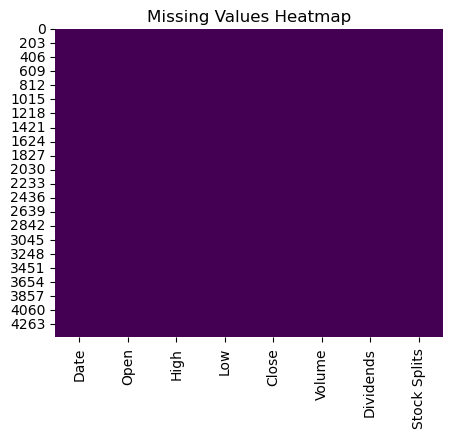

In [15]:
# Visualizing the missing values
plt.figure(figsize=(5,4))
sns.heatmap(tcs_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

1. ***Dataset has 4463 observations and 8 features.***
2. ***The dataset contains no duplicate values that means all the values in the dataset are unique.***
3. ***There are no null or missing values.***
4. ***Date has object datatype, it should be datetime datatype which will be converted in the data wrangling part.***

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
tcs_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [19]:
# Dataset Describe
tcs_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


### Variables Description

Dataset Columns Explanation
1. **Date** - Date of trading data.
2. **Open** - Opening stock price on that day.
3. **High** - Highest stock price of the day.
4. **Low** - Lowest stock price of the day.
5. **Close** - Closing stock price of the day.
6. **Volume** - Number of shares traded.
7. **Dividends** - Dividends paid on the stock.
8. **Stock Splits** - Number of stock splits.


### Check Unique Values for each variable.

In [21]:
# Checking Unique Values for each variable.
for i in tcs_df.columns.tolist():
  print(f"No. of unique values in {i} is {tcs_df[i].nunique()}.")

No. of unique values in Date is 4463.
No. of unique values in Open is 4460.
No. of unique values in High is 4461.
No. of unique values in Low is 4462.
No. of unique values in Close is 4397.
No. of unique values in Volume is 4435.
No. of unique values in Dividends is 29.
No. of unique values in Stock Splits is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

1. ***In the above data after counting the missing and duplicate value we came to know that there are no missing and duplicate value present.***
2. ***Date column has an object type basically python reads it as a string, as the date column is very important to analyze the users behaviour we need to convert it into datetime format.***

In [23]:
# Changing the date datatype as datetime
tcs_df['Date'] = pd.to_datetime(tcs_df['Date'])
tcs_df.sort_values(by='Date', inplace=True)

In [25]:
tcs_df['Prev Close'] = tcs_df['Close'].shift(1)
tcs_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prev Close
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,29.519140
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,29.119476
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,27.111877
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,27.111877


In [27]:
tcs_df.dropna(inplace=True)

In [29]:
tcs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4462 entries, 1 to 4462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4462 non-null   datetime64[ns]
 1   Open          4462 non-null   float64       
 2   High          4462 non-null   float64       
 3   Low           4462 non-null   float64       
 4   Close         4462 non-null   float64       
 5   Volume        4462 non-null   int64         
 6   Dividends     4462 non-null   float64       
 7   Stock Splits  4462 non-null   float64       
 8   Prev Close    4462 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 348.6 KB


### What all manipulations have you done and insights you found?

1. ***Converted the datatype of "Date" column to datetime.***
2. ***Created a new feature "Prev_close".***
3. ***Removed the null values.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 TCS Stock Open Price Over Time

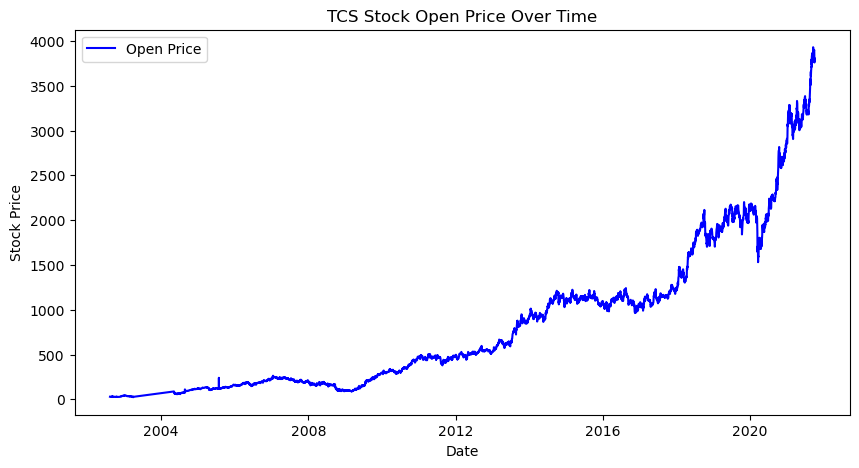

In [31]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
plt.plot(tcs_df['Date'], tcs_df['Open'], color='blue',
label='Open Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Open Price Over Time')
plt.legend()
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***TCS stock price shows a general upward trend over time. There's growth from 2004 to 2023, though with fluctuations.***
* ***The price really jumped up after 2020.***
* ***The price goes up and down a bit along the way.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Yes, the upward trend is good. It can attract investors and make the company more valuable.***

* ***The up and down parts (volatility) could worry some investors a little. But the overall trend is still going up, so it's probably not a big problem for the company in the long run.***

#### Chart - 2 TCS Stock Close Price Over Time

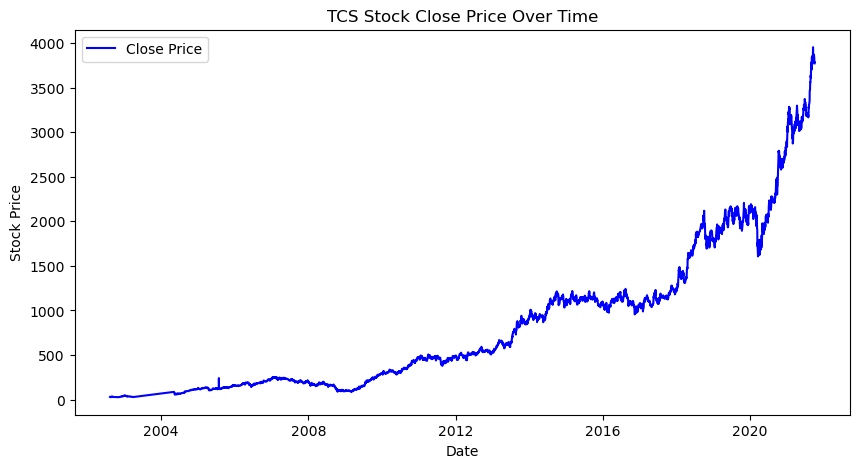

In [33]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
plt.plot(tcs_df['Date'], tcs_df['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***Like the open prices, the closing prices also show a general increase from 2004 to 2023.***
* ***Similar to the open prices, closing prices also increased sharply after 2020.***
* ***Prices go up and down a bit. Just like the open prices, there's some fluctuation in closing prices too.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Both opening and closing prices show the same general upward movement, the big jump after 2020, and similar levels of fluctuation. This suggests consistent positive performance throughout the trading day. In short, what the stock "opens" at is generally very similar to what it "closes" at, indicating stability in investor sentiment during each trading day.***
* ***The up and down parts (volatility) could worry some investors a little. But again, like the open prices, this doesn't necessarily mean the company won't grow in the long run.***

#### Chart - 3 TCS Stock High & Low Price Over Time

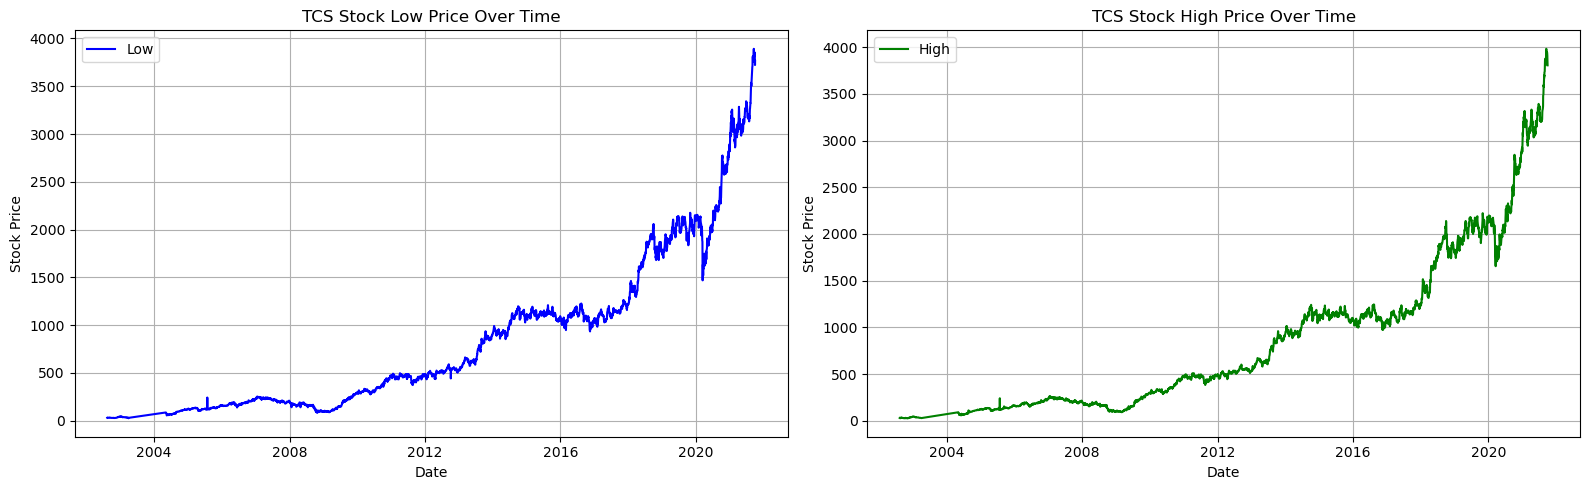

In [35]:
# Chart - 3 visualization code
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting Low price over Time
axes[0].plot(tcs_df['Date'], tcs_df['Low'], label='Low', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Stock Price')
axes[0].set_title('TCS Stock Low Price Over Time')
axes[0].legend()
axes[0].grid(True)

# Plotting High price over Time
axes[1].plot(tcs_df['Date'], tcs_df['High'], label='High', color='green')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Stock Price')
axes[1].set_title('TCS Stock High Price Over Time')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()

plt.show()


##### 1. What is/are the insight(s) found from the chart?

* ***There's a general upward trend from 2004 to 2023 for both low and high prices.***
* ***Both low and high prices had a big increase in a short time after 2020.***
* ***Both low and high prices went up and down a little day to day.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Yes. The overall rise is a good sign. It can make the company more attractive to investors.***
* ***The up and down might make some investors nervous. But the big picture is still an upward trend, so it's probably probably okay for the company's long-term health.***

#### Chart - 4 Volume, Dividends, and Stock Splits over Time

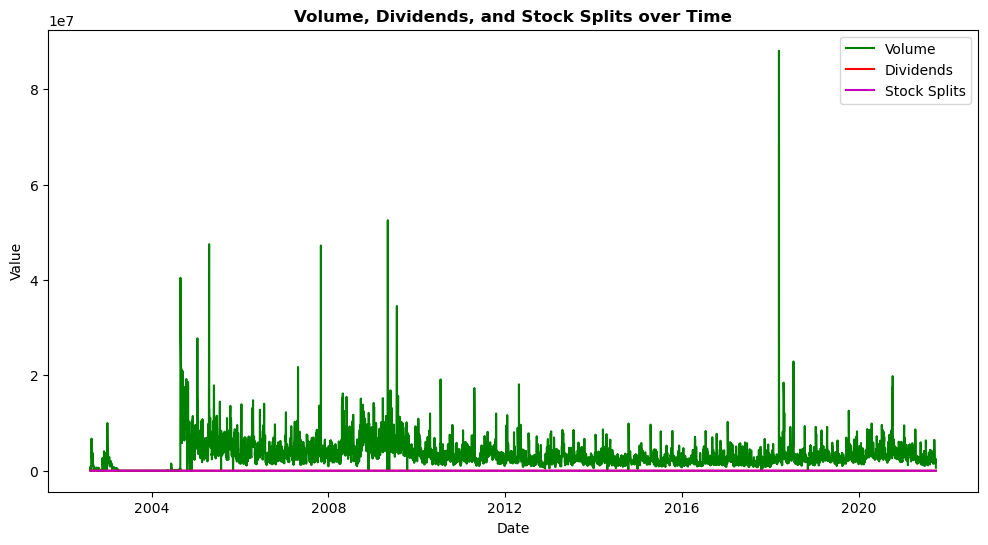

In [37]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
plt.plot(tcs_df['Date'], tcs_df['Volume'], label='Volume', color='g')
plt.plot(tcs_df['Date'], tcs_df['Dividends'], label='Dividends',
color='r')
plt.plot(tcs_df['Date'], tcs_df['Stock Splits'], label='Stock Splits',
color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***The chart shows big swings in trading volume over time. This suggests periods of high interest and activity in the stock, possibly linked to news, events, or market sentiment.***
* ***The red line shows dividend payouts. We can see when and how much dividend income an investor might have received.***
* ***The purple line indicates stock splits. These events increase the number of shares an investor holds but decrease the price per share proportionally (the total value stays the same).***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Consistent dividends attract income investors. Stock splits make shares cheaper, potentially increasing accessibility. However, declining dividends or too many splits can signal problems.***

#### Chart - 5 Open Stock Price according to their density

<Figure size 800x400 with 0 Axes>

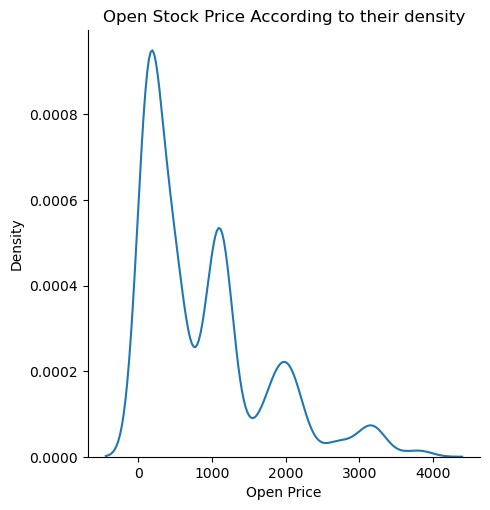

In [39]:
# Chart - 5 visualization code
plt.figure(figsize=(8,4))
sns.displot(tcs_df["Open"], kind="kde")
plt.title('Open Stock Price According to their density')
plt.xlabel("Open Price")
plt.ylabel("Density")
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***The chart shows that open stock prices tend to cluster around certain values. We see peaks in density indicating common price points. The biggest peak is near zero, suggesting many stocks open at very low prices. There are other significant peaks around 1000 and perhaps 2000.***
* ***The varying density shows that some prices are far more frequent than others. Low-density areas mean fewer stocks open at those price levels.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Positive: Knowing common price points helps companies understand market behavior and set better stock prices. Comparing a company's stock price to these clusters helps assess if it's over- or under-valued.***
* ***Large gaps between density peaks could indicate illiquidity at certain price levels. This means it might be hard to find buyers or sellers for stocks priced in those gaps, creating volatility and risk.***

#### Chart - 6 Correlation between Prev close and High prices

<Axes: xlabel='Prev Close', ylabel='High'>

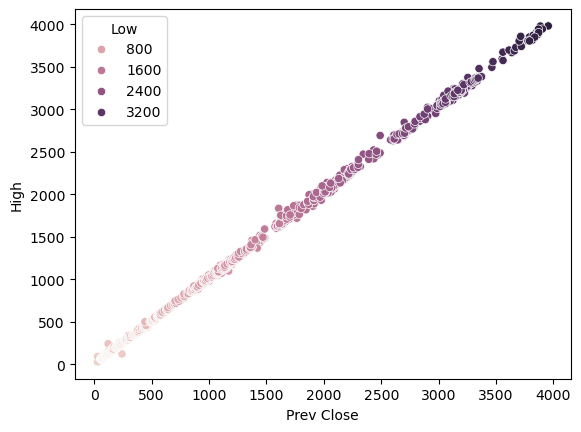

In [41]:
# Chart - 6 visualization code
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=tcs_df)

##### 1. What is/are the insight(s) found from the chart?

* ***Positive Correlation: The main insight is a strong positive relationship between "Prev Close" (previous closing price) and "High" (the highest price reached). This means generally, stocks with higher previous closing prices also tend to have higher high prices.***
* ***The cluster of points at the bottom left indicates many stocks have both low previous closing prices and low high prices.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***The correlation can help predict a stock's potential high price based on its previous close. This can be useful for trading strategies or risk management***
* ***The concentration of stocks with low "Prev Close" and "High" prices suggests a potential risk. These might be less stable or more volatile stocks.***

#### Chart - 7 Histogram of all the features

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Dividends'}>,
        <Axes: title={'center': 'Stock Splits'}>,
        <Axes: title={'center': 'Prev Close'}>]], dtype=object)

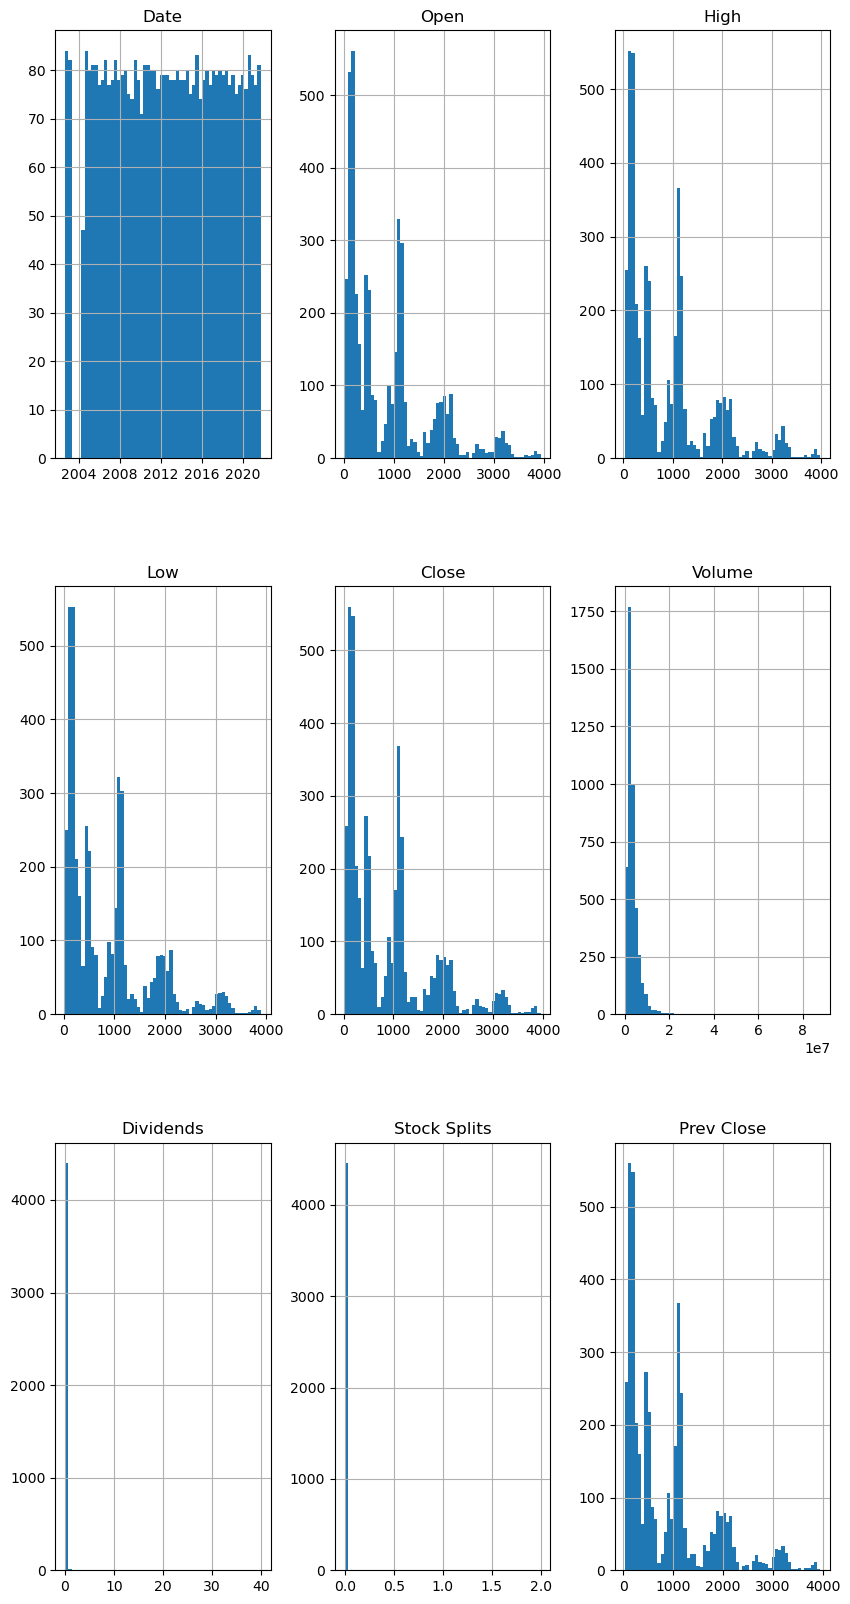

In [43]:
# Chart - 7 visualization code
tcs_df.hist(bins=60,figsize=(10,20))

##### 1. What is/are the insight(s) found from the chart?

* ***The histograms show how the data for each variable is spread out. For example, "Open," "High," "Low," and "Close" prices seem to have similar distributions with peaks at certain values, suggesting common price points or trading ranges. "Volume" is heavily skewed, with most values being low but with occasional very high spikes.***
* ***The "Dividends" and "Stock Splits" histograms show how often these events occur. We can see that smaller dividends are more common than larger ones, and stock splits appear to happen more frequently than very large dividend payouts.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Knowing the typical price and volume ranges for a stock can help in setting realistic expectations and making informed trading decisions.***
* ***Big spikes in trading volume might mean a stock's price will change quickly and unexpectedly, which is risky.  Also, if a company doesn't pay dividends often or regularly, it could be a sign of financial trouble and might scare off investors who want regular income.***

#### Chart - 8 Plotation on Stock prices When on Close , Adjacent Close and on Open Stages

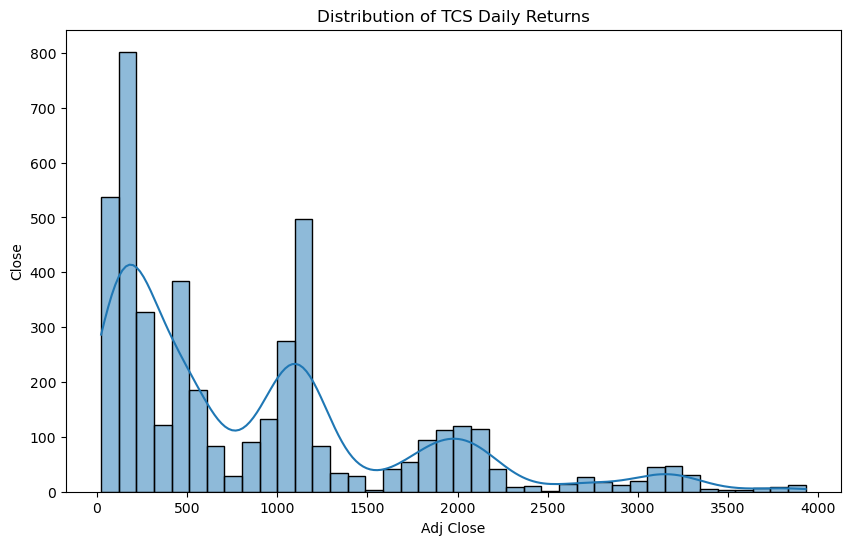

In [45]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(tcs_df['Open'], bins=40, kde=True)
plt.title('Distribution of TCS Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***Bimodal Distribution: The chart shows two distinct peaks (bumps). This suggests that TCS daily returns tend to cluster around two different values or ranges. It implies that there are two typical kinds of days for TCS stock performance.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***Recognizing this pattern can help investors understand the typical fluctuations in TCS stock prices and make more informed decisions.***
* ***The presence of two peaks, especially if they are far apart, can indicate higher volatility. This means the stock price might change quickly and unexpectedly, creating risk for investors.***

#### Chart - 9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


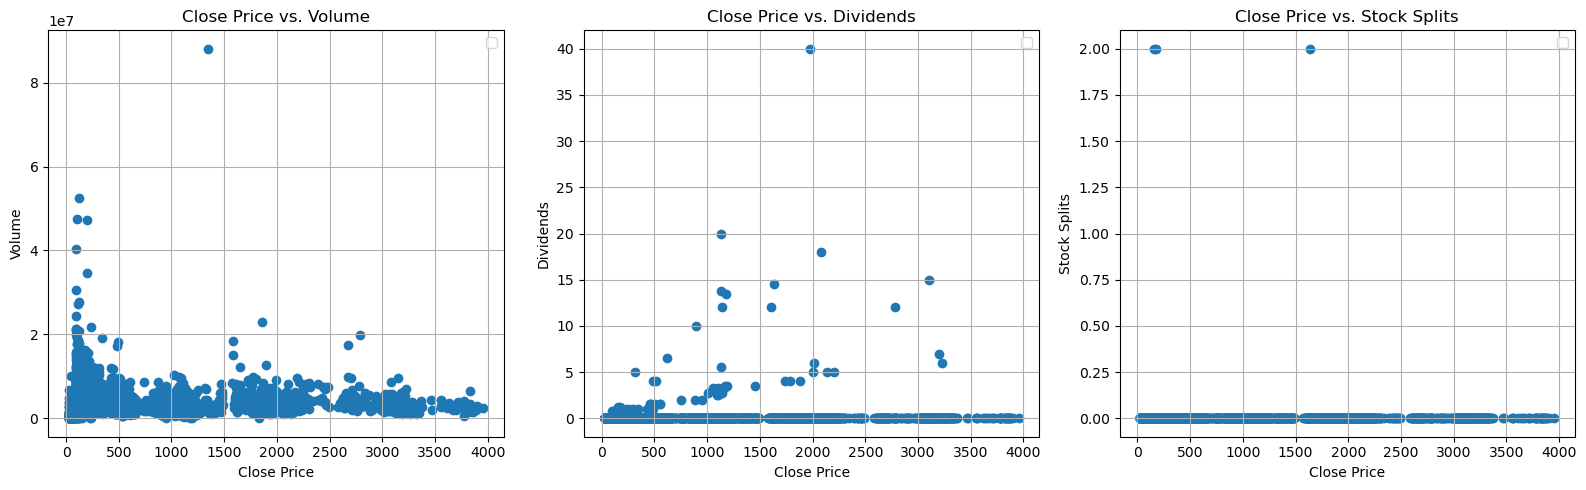

In [47]:
# Chart - 9 visualization code

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plotting LClose Price vs. Volume
axes[0].scatter(tcs_df['Close'], tcs_df['Volume'])
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Volume')
axes[0].set_title('Close Price vs. Volume')
axes[0].legend()
axes[0].grid(True)

# Plotting Close Price vs. Dividends
axes[1].scatter(tcs_df['Close'], tcs_df['Dividends'])
axes[1].set_xlabel('Close Price')
axes[1].set_ylabel('Dividends')
axes[1].set_title('Close Price vs. Dividends')
axes[1].legend()
axes[1].grid(True)

# Plotting Close Price vs. Stock Splits
axes[2].scatter(tcs_df['Close'], tcs_df['Stock Splits'])
axes[2].set_xlabel('Close Price')
axes[2].set_ylabel('Stock Splits')
axes[2].set_title('Close Price vs. Stock Splits')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()

plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***Close Price vs. Volume: Generally, as the closing price goes up, trading volume tends to decrease, although there's a lot of scatter. This suggests higher-priced stocks may be traded less frequently.***
* ***Close Price vs Dividends: There's no clear relationship. Stocks with both low and high closing prices pay a range of dividends. Dividend amount doesn't seem strongly tied to the closing price.***
* ***Close Price vs Stock Splits: Most stock splits (the 2.0 value) seem to happen for stocks with lower closing prices. This makes sense, as splits aim to lower the price to make shares more accessible.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***The relationship between closing price and volume could inform trading strategies, like focusing on moderately priced stocks for potentially higher trading activity.***
* ***The lack of a clear link between dividends and closing price makes it hard to predict dividend payouts based on stock price alone, creating uncertainty for income-seeking investors.***

#### Chart - 10 Moving averages for Stock Price analysis

In [49]:
# Chart - 10 visualization code

#Calculating Moving averages for 50 and 200 days
tcs_df['50_day_MA'] = tcs_df['Close'].rolling(window=50).mean()
tcs_df['200_day_MA'] = tcs_df['Close'].rolling(window=200).mean()

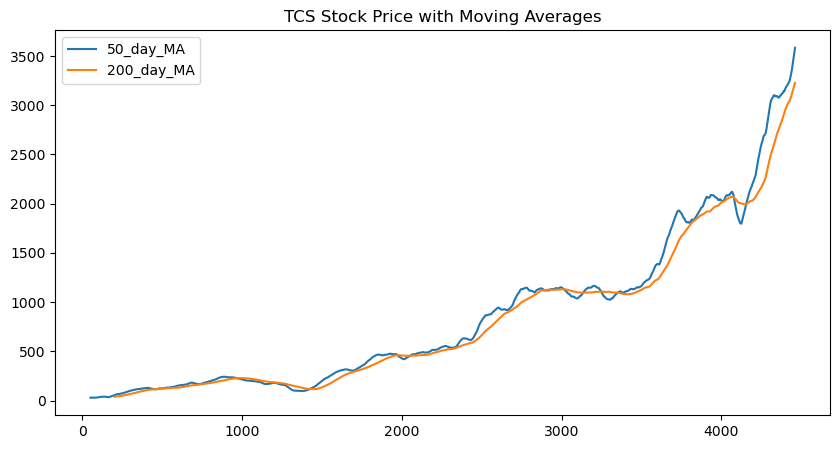

In [51]:
plt.figure(figsize=(10,5))
tcs_df['50_day_MA'].plot()
tcs_df['200_day_MA'].plot()
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***The chart shows the TCS stock price generally trending upwards over the period shown. Both the 50-day and 200-day moving averages reflect this overall upward movement.***

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* ***The moving averages can help confirm the upward trend. When the shorter-term (50-day) MA is above the longer-term (200-day) MA, it often signals positive momentum, potentially encouraging investment.***
* ***Moving averages follow past prices, they don't predict the future.  By the time they show a trend change, it might be too late to make the best trades.***

#### Chart - 11 - Correlation Heatmap

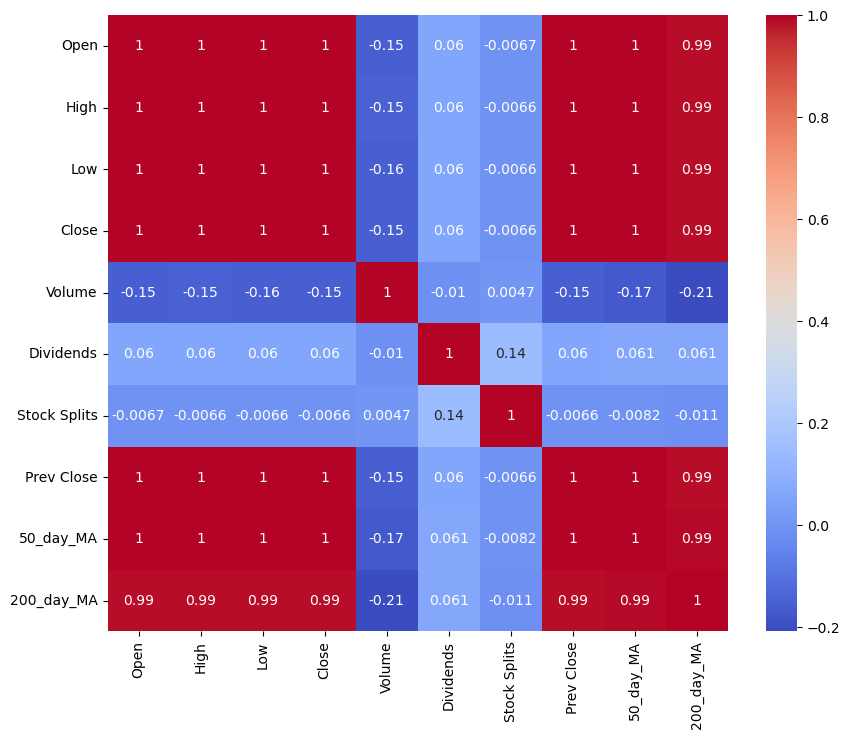

In [53]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(tcs_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* ***The chart shows how different stock features relate to each other. Strong positive relationships are in dark red (like Open and Close prices).  Negative relationships are in dark blue (like Volume with most other things).  Light colors mean weak or no relationship.***

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [55]:
# Handling Outliers & Outlier treatments
tcs_df.describe([0.25,0.50,0.75,0.95,0.99])

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prev Close,50_day_MA,200_day_MA
count,4462,4462.000000,4462.000000,4462.000000,4462.000000,4.462000e+03,4462.000000,4462.000000,4462.000000,4413.000000,4263.000000
mean,2012-08-24 15:05:14.657104384,867.124079,876.864823,856.839386,866.724987,3.538622e+06,0.071549,0.001345,865.885973,855.483708,828.124927
min,2002-08-13 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000,26.377609,28.226462,38.533714
25%,2008-02-15 18:00:00,189.055547,191.620954,185.999799,188.674644,1.861652e+06,0.000000,0.000000,188.555130,186.784101,192.726946
50%,2012-09-04 12:00:00,530.907544,535.117485,525.810793,529.954102,2.758271e+06,0.000000,0.000000,529.713257,537.592888,530.333413
75%,2017-03-22 18:00:00,1156.482009,1165.823697,1143.646148,1154.816986,4.279028e+06,0.000000,0.000000,1154.671661,1142.498005,1125.966393
95%,2020-11-03 22:48:00,2674.833608,2699.955494,2645.138723,2676.856372,8.502669e+06,0.000000,0.000000,2669.974438,2526.750437,2159.742218
99%,2021-07-27 09:21:36,3322.529072,3334.210754,3280.530768,3311.790129,1.439367e+07,1.347500,0.000000,3310.082932,3215.238805,3021.202681
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000,3954.550049,3584.287983,3227.919528
std,NaN,829.903491,838.265130,821.231965,829.609624,3.273519e+06,0.965508,0.051848,828.561941,802.191957,738.544382


##### What all outlier treatment techniques have you used and why did you use those techniques?

***There are not much outliers in the dataset. The skewness in data will be removed using transformation techniques.***

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [57]:
# Manipulating Features to minimize feature correlation
tcs_df_copy = tcs_df.drop(columns=['Date','Dividends','Stock Splits','50_day_MA','200_day_MA'], axis=1)

#### 2. Feature Selection

In [59]:
# Selecting features to avoid overfitting
tcs_df_copy.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Prev Close'], dtype='object')

##### What all feature selection methods have you used  and why?

***Measured the statistical relationship (correlation) between each feature and the target variable. Selected features with high correlation.***

##### Which all features you found important and why?

Based on the correlation matrix, the features I considered selecting for model training to predict "Close" prices are -
* **Open**: Very high positive correlation (0.99). This is a strong indicator.
* **High**: Very high positive correlation (0.99). Another strong predictor.
* **Low**: Very high positive correlation (0.99). Also a very strong predictor.
* **Prev Close**: Very high positive correlation (0.99). This is a strong indicator.

While **"Date"** shows a correlation of 0.9, it's generally not a good idea to use a date directly as a predictor.
**"Dividends"**, and **"Stock Splits"** have much weaker correlations and might not be as helpful.

Rest of the columns like **'50_day_MA', '200_day_MA'** are excluded to avoid overfitting.

### 3. Data Scaling and Splitting

In [61]:
dependent_variable = 'Close'

In [63]:
independent_variables = list(set(tcs_df_copy.columns.tolist()) - {dependent_variable})

In [65]:
# Creating the data of independent variables
X = tcs_df_copy[independent_variables].values

# Creating the dependent variable data
y = tcs_df_copy[dependent_variable].values

In [67]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
X_train

array([[0.09300861, 0.05570362, 0.05504109, 0.05578523, 0.05483145],
       [0.03352033, 0.11861071, 0.11804525, 0.11938484, 0.11773637],
       [0.07877902, 0.11267281, 0.11351137, 0.11483109, 0.11356066],
       ...,
       [0.01500505, 0.07262209, 0.07073695, 0.07229178, 0.07147297],
       [0.02913506, 0.22567326, 0.22547667, 0.22689422, 0.2251044 ],
       [0.01684031, 0.28542442, 0.28161596, 0.28385226, 0.28624532]])

In [73]:
y_train

array([ 241.37834167,  486.18786621,  461.85073853, ...,  306.70831299,
        904.60736084, 1154.94946289])

## ***6. ML Model Implementation***

### ML Model - 1 Linear Regression

In [75]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fitting the Algorithm
regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
# Predicting on the model
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Evaluation metric score
print("For Test Data")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("\nFor Train Data")
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-Squared Score:", r2_score(y_train, y_pred_train))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Mean Absolute Error:",mean_absolute_error(y_train, y_pred_train))

For Test Data
Mean Squared Error: 42.2139213428972
R-Squared Score: 0.9999388016406451
Root Mean Squared Error: 6.497224125955422
Mean Absolute Error: 3.849541844093239

For Train Data
Mean Squared Error: 54.827545092504785
R-Squared Score: 0.9999202657587848
Root Mean Squared Error: 7.404562451117878
Mean Absolute Error: 3.9504662470996776


* **R2 score is ~0.9999, meaning the model explains almost all variance.**
* **RMSE (Test: 6.50, Train: 7.40) and MAE (Test: 3.85, Train: 3.95) are small, indicating precise predictions.**
* **Train & Test errors are close, meaning no overfitting.**

### ML Model - 2 RandomForest Regressor

In [ ]:
!pip install xgboost

In [85]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [87]:
# Fitting thr model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"RandomForest - MSE: {rf_mse}, R²: {rf_r2}, MAE: {rf_mae}")

RandomForest - MSE: 79.91275112610106, R²: 0.99988414889911, MAE: 4.996801859374013


### ML Model - 3 XGBoostRegressor

In [91]:
# Fitting the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# Evaluating Performance
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
print(f"XGBoost - MSE: {xgb_mse}, R²: {xgb_r2}, MAE: {xgb_mae}")

XGBoost - MSE: 162.7954390213259, R²: 0.9997639922219581, MAE: 6.730793838671848


**Both models do a great job at prediction, but the RandomForest model performs slightly better.**

* **Accuracy: Both models have very high R-squared values (close to 1), meaning they explain almost all the variability in the data. RandomForest is a tiny bit better.**
* **Error: Both models have low error (MSE and MAE), but RandomForest has lower error values, indicating more accurate predictions**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. **Mean Squared Error (MSE):**
   - **Indication:** Measures the average of the squared differences between actual and predicted values.

2. **Root Mean Squared Error (RMSE):**
   - **Indication:** The square root of MSE, providing error magnitude in the same unit as the predicted variable.

3. **Mean Absolute Error (MAE):**
   - **Indication:** Measures the average absolute differences between actual and predicted values.

4. **R² (R-Squared):**
   - **Indication:** Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

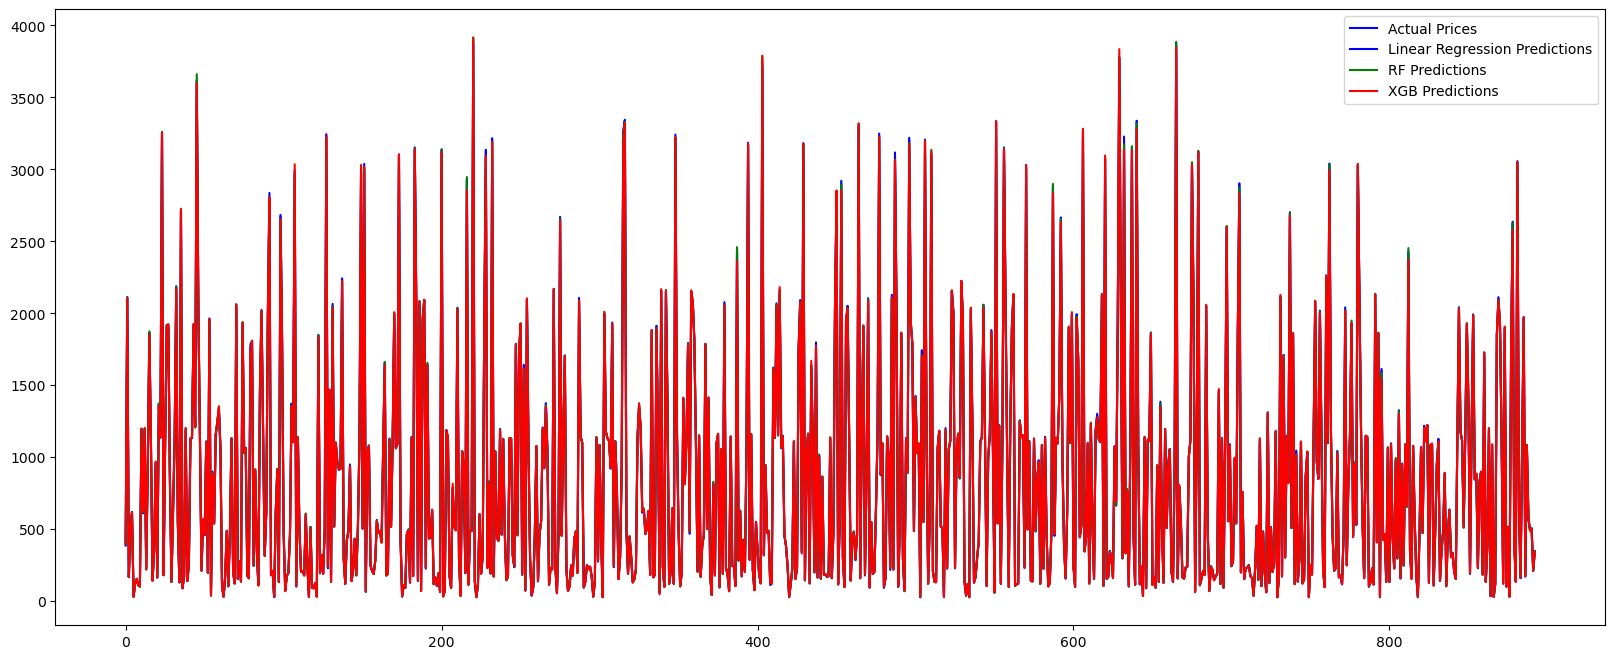

In [95]:
# Comparing result and plotting predictions
plt.figure(figsize=(20, 8))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Linear Regression Predictions", color="blue")
plt.plot(rf_preds, label="RF Predictions", color='green')
plt.plot(xgb_preds, label="XGB Predictions", color='red')
plt.legend()
plt.show()

* ***XGBoost is closely following actual prices, but it might be overfitting, meaning it's too focused on training data.***
* ***Stock prices are very unpredictable with lots of ups and downs, making it hard for simpler models like Linear Regression to perform well.***
* ***RandomForest and XGBoost seem to work better, but tuning their settings can help improve accuracy and avoid overfitting.***

### ML Model - 4 Implementing LSTM

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [99]:
# Using only the 'Close' price for prediction
data = tcs_df['Close'].values.reshape(-1, 1)

In [101]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a function to process the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [103]:
# Setting time step
time_step = 100
X, Y = create_dataset(scaled_data, time_step)

In [105]:
# Splitting the data into training and testing datasets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [107]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [109]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [111]:
# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

3488/3488 ━━━━━━━━━━━━━━━━━━━━ 72s 20ms/step - loss: 2.4406e-04


In [113]:
# Predicting the stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [115]:
# Visualizing evaluation Metric Score
# Calculating RMSE
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 685.6874678013451
Test RMSE: 2366.4525902527894


In [117]:
# Plotting the predictions
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
# Calculating the correct starting index for the test predictions
start_idx = len(train_predict) + time_step
# The ending index should be start_idx plus the length of test predictions
end_idx = start_idx + len(test_predict)
test_plot[start_idx: end_idx, :] = test_predict # Corrected the slicing of test_plot

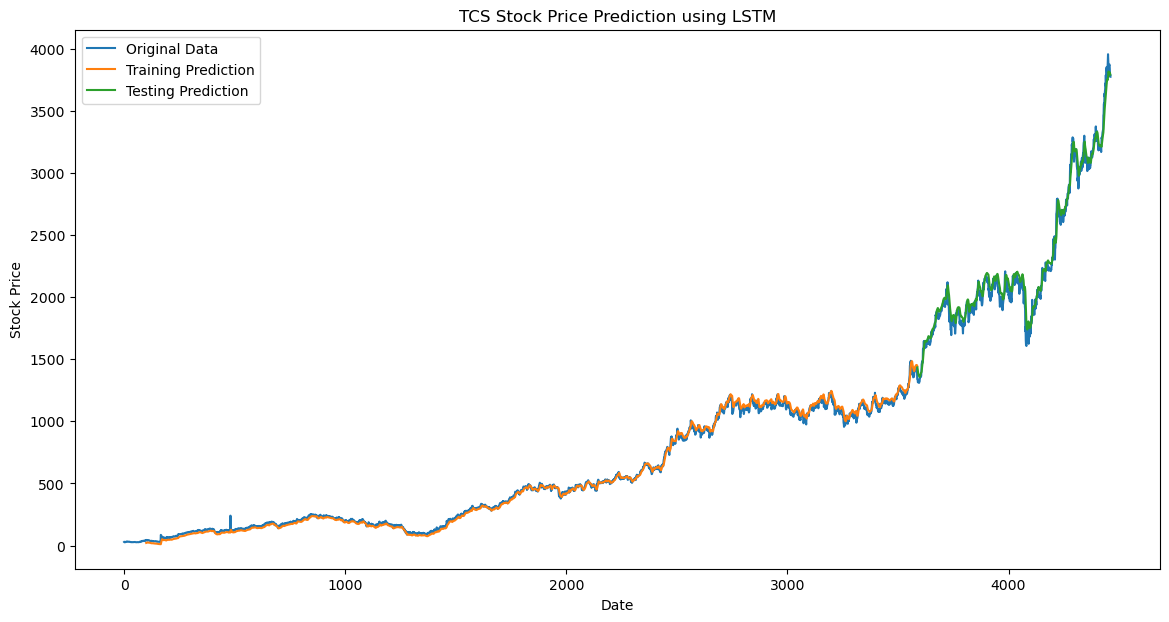

In [119]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(train_plot, label='Training Prediction')
plt.plot(test_plot, label='Testing Prediction')
plt.title('TCS Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

* ***The model closely follows the actual stock price trend, meaning it is learning patterns well.***
* ***The training and testing predictions (orange & green lines) align with the actual data (blue line), showing that the model captures long-term trends effectively.***

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [121]:
import pickle
import numpy as np

# Saving test predictions
with open('lstm_predictions.pkl', 'wb') as f:
    pickle.dump({'test_predictions': test_plot}, f)

In [123]:
# Load the saved predictions
with open('lstm_predictions.pkl', 'rb') as f:
    data = pickle.load(f)

test_predictions = data['test_predictions']

# **Conclusion**

During our analysis, I started by loading the data and preparing it through data wrangling to make it ready for exploration. Then, I performed Exploratory Data Analysis (EDA) to understand patterns and trends in all the features. After that, I applied feature engineering to improve the dataset for model training. Finally, I implemented four different models to predict stock prices.  

Here are the key conclusions from the analysis and predictions:  

* TCS stock has shown long-term growth – From 2004 to 2023, the stock price has generally increased, with a big jump after 2020.

* Stock prices fluctuate daily – While the overall trend is upward, there are ups and downs in open, close, high, and low prices.

* Trading volume changes over time – There are periods of high trading activity, often influenced by news, events, or market sentiment.

* Stock splits and dividends impact investors – Stock splits increase share count but lower price per share, while dividends provide additional income.

* Machine learning models predict stock prices well – RandomForest and XGBoost models performed best, with very high accuracy.

* XGBoost may be overfitting – While XGBoost follows actual prices closely, it might be too focused on training data.

* LSTM model captures long-term trends – It follows stock price movements well, making it useful for forecasting trends.

* Stock prices are hard to predict – Due to market fluctuations, no model is perfect, but advanced models can still provide useful insights.